In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/amazon.csv')

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
cat = df.category.value_counts()

cat.head()

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

In [15]:
df.shape

(2443651, 9)

In [8]:
import pylab as plt

import seaborn as sns

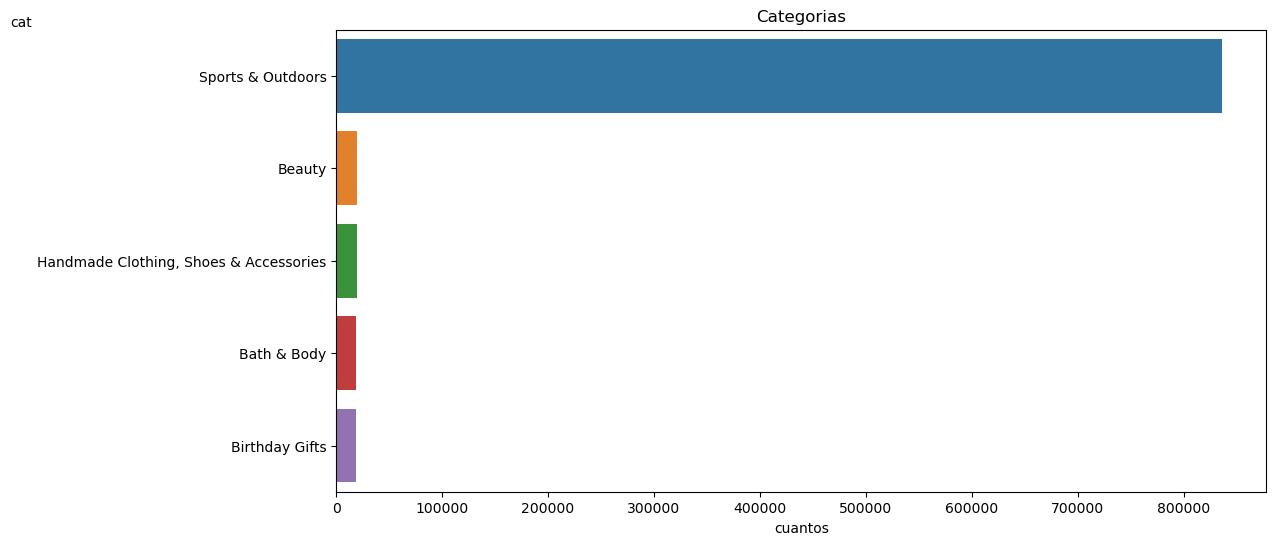

In [30]:
# bar chart

plt.figure(figsize=(12, 6))

sns.countplot(data=df, y='category', order=cat.head().index)

plt.title('Categorias')

plt.ylabel('cat', loc='top', rotation=0)

plt.xlabel('cuantos')

plt.show();

In [27]:
help(plt.ylabel)

Help on function ylabel in module matplotlib.pyplot:

ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    Set the label for the y-axis.
    
    Parameters
    ----------
    ylabel : str
        The label text.
    
    labelpad : float, default: :rc:`axes.labelpad`
        Spacing in points from the Axes bounding box including ticks
        and tick labels.  If None, the previous value is left as is.
    
    loc : {'bottom', 'center', 'top'}, default: :rc:`yaxis.labellocation`
        The label position. This is a high-level alternative for passing
        parameters *y* and *horizontalalignment*.
    
    Other Parameters
    ----------------
    **kwargs : `.Text` properties
        `.Text` properties control the appearance of the label.
    
    See Also
    --------
    text : Documents the properties supported by `.Text`.



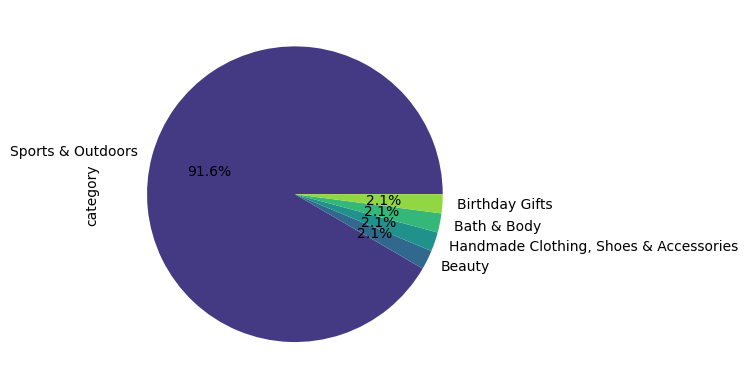

In [31]:
top_5 = cat.head()

top_5.plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette('viridis', 5));

**Interpretation for Part 1: Understanding Product Categories**

The most popular product categories on Amazon UK, based on listing frequency, are as follows:

1. **Sports & Outdoors** with 836,265 listings, overwhelmingly dominates the platform.
2. **Beauty** with 19,312 listings.
3. **Handmade Clothing, Shoes & Accessories** with 19,229 listings.
4. **Bath & Body** with 19,092 listings.
5. **Birthday Gifts** with 18,978 listings.

Clearly, "Sports & Outdoors" stands out as the most listed category by a significant margin. The other categories in the top 5 have comparable numbers of listings, but they pale in comparison to "Sports & Outdoors."

Given the vast difference between the first category and the rest, sellers dealing in "Sports & Outdoors" products might face higher competition on Amazon UK. At the same time, the sheer volume suggests a potential high demand in this category.

**Measures of Centrality:**

In [33]:
df.price.mean()

89.24380943923663

In [34]:
df.price.median()

19.09

In [36]:
df.price.mode()[0]

9.99

**Measures of Dispersion:**

In [39]:
round(df.price.var(), 2)

119445.49

In [41]:
df.price.std()

345.60886175352226

In [42]:
type(df.price.std())

float

In [47]:
df.price.head().round(2)

0    21.99
1    23.99
2    21.99
3    31.99
4    17.99
Name: price, dtype: float64

In [44]:
type(df.price)

pandas.core.series.Series

In [48]:
df.price.min()

0.0

In [49]:
df.price.max()

100000.0

In [50]:
df[df.price==df.price.max()]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.0,False,0,Sports & Outdoors


In [51]:
q1 = df.price.quantile(0.25)

q3 = df.price.quantile(0.75)

In [52]:
q1, q3

(9.99, 45.99)

In [53]:
iqr = q3 - q1

iqr

36.0

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [56]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [65]:
media = df.price.mean()

std = (sum([(e-media)**2 for e in df.price]) / df.shape[0]) ** 0.5

std

345.6087910378437

In [63]:
media

89.24380943923663

In [67]:
df[df.price==df.price.mode()[0]].shape

(48922, 9)

**Interpretation**:

- The average (mean) price of products listed on Amazon UK is approximately £89.24.
- The median price of the products (the middle value when sorted) is £19.09. This is notably lower than the mean, suggesting that there are several high-priced items skewing the average upwards.
- The lowest priced item(s) on Amazon UK are available for free (or £0.00, which might indicate certain promotional products or digital products).
- The highest priced item is listed at £100,000. This indicates the presence of some luxury or niche items on the platform.
- The interquartile range (25% to 75% percentile) shows that 50% of the products on Amazon UK are priced between £9.99 and £45.99. This gives a sense of the typical price range for a majority of products.
  
From a business perspective, it's clear that while Amazon UK does cater to premium segments, a significant portion of its product listings are more affordably priced, making it accessible to a broader customer base.

Now, let's visually represent the distribution of product prices using histograms and box plots.

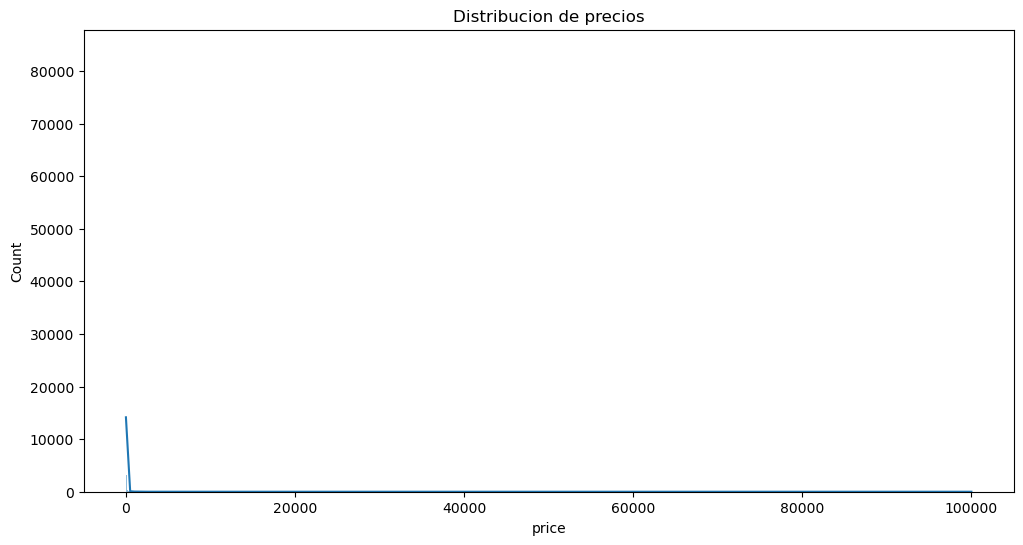

In [68]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df.price, kde=True)

plt.title('Distribucion de precios')

plt.show();

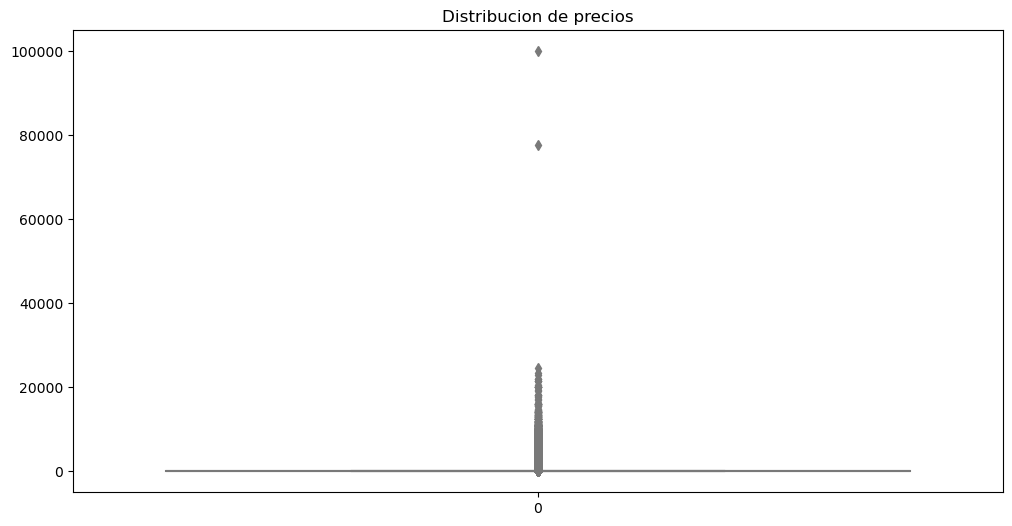

In [69]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df.price, color='lightblue')

plt.title('Distribucion de precios')

plt.show();

In [73]:
iqr*1.5

54.0

In [72]:
df.price.describe().round()

count    2443651.0
mean          89.0
std          346.0
min            0.0
25%           10.0
50%           19.0
75%           46.0
max       100000.0
Name: price, dtype: float64

In [74]:
precio = df[df.price<=200].price

precio.head()

0    21.99
1    23.99
2    21.99
3    31.99
4    17.99
Name: price, dtype: float64

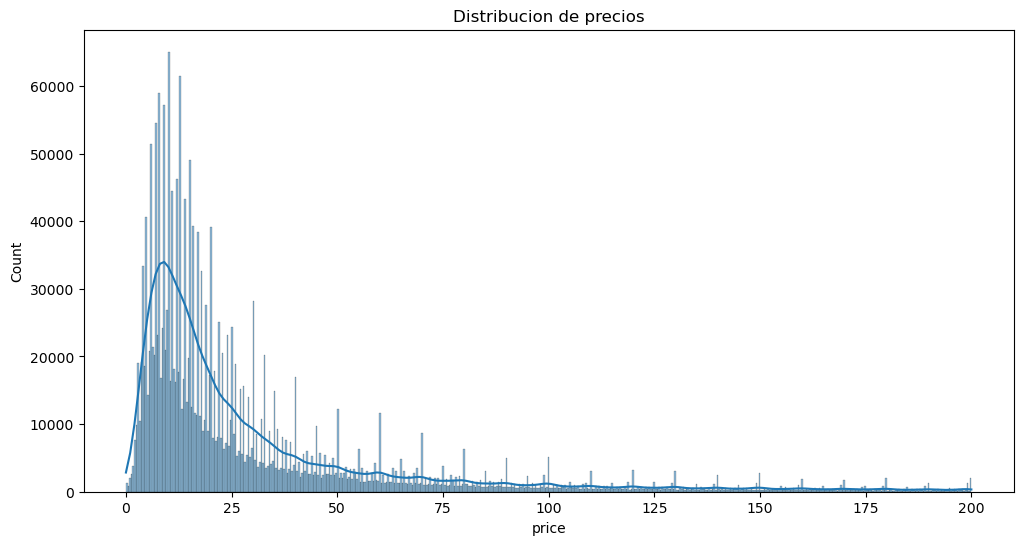

In [75]:
plt.figure(figsize=(12, 6))

sns.histplot(data=precio, kde=True)

plt.title('Distribucion de precios')

plt.show();

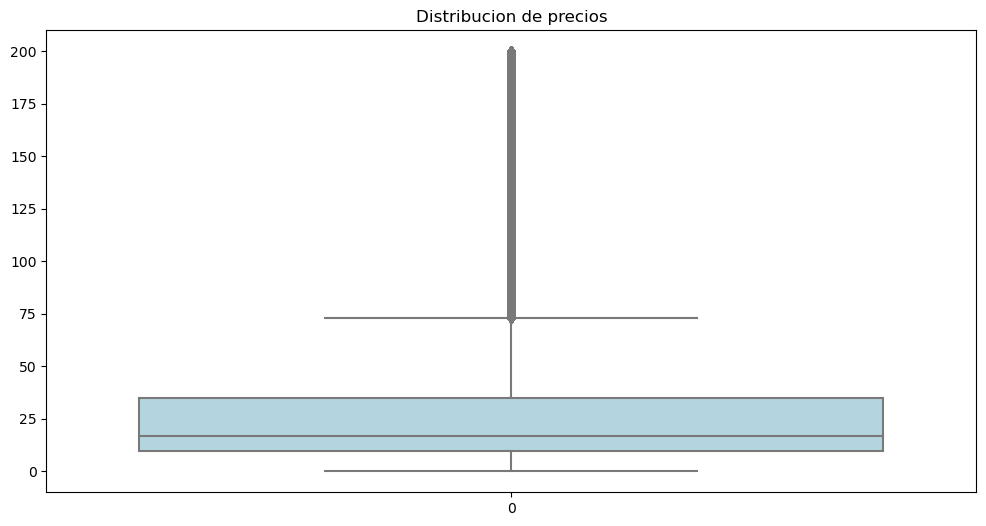

In [76]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=precio, color='lightblue')

plt.title('Distribucion de precios')

plt.show();

In [78]:
df.price.describe().round()

count    2443651.0
mean          89.0
std          346.0
min            0.0
25%           10.0
50%           19.0
75%           46.0
max       100000.0
Name: price, dtype: float64

In [79]:
df[df.price>50000]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1987238,2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.0,False,0,Desktop PCs
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.0,False,0,Sports & Outdoors


# estrellas

In [80]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [81]:
df.stars.mean()

2.152836472966065

In [82]:
df.stars.median()

0.0

In [83]:
df.stars.mode()[0]

0.0

In [84]:
df.stars.std()

2.1948653785054697

In [85]:
df.stars.var()

4.81743402976196

In [86]:
q1 = df.stars.quantile(0.25)

q3 = df.stars.quantile(0.75)

q1, q3

(0.0, 4.4)

In [87]:
df.stars.max()

5.0

In [89]:
df[df.stars==df.stars.mode()[0]].shape

(1225641, 9)

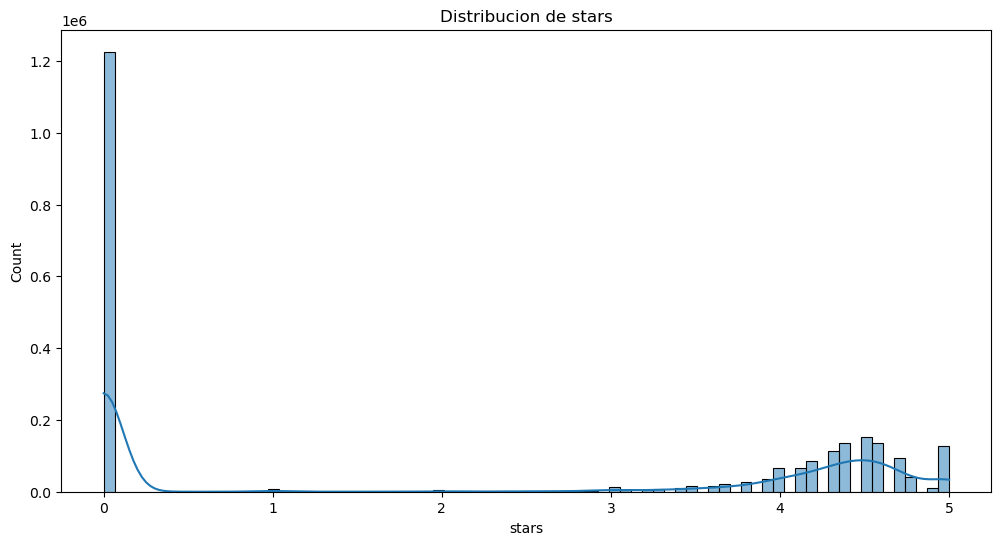

In [102]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df.stars, kde=True)

plt.title('Distribucion de stars')

plt.show();

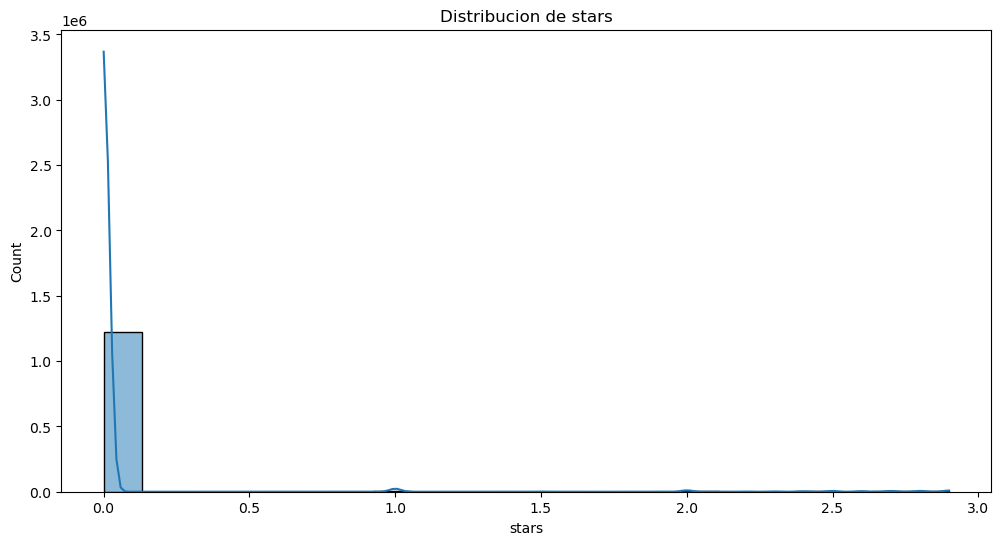

In [103]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df[df.stars<3].stars, kde=True)

plt.title('Distribucion de stars')

plt.show();

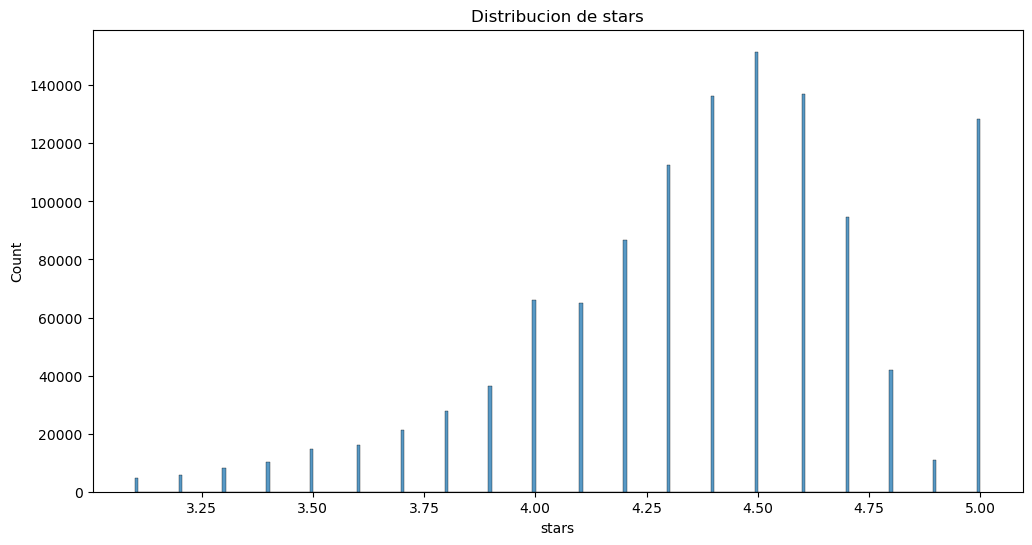

In [104]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df[df.stars>3].stars)

plt.title('Distribucion de stars')

plt.show();

<Figure size 1200x600 with 0 Axes>

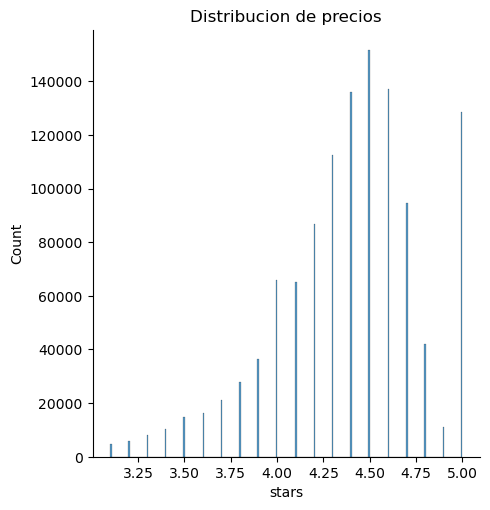

In [101]:
plt.figure(figsize=(12, 6))

sns.displot(df[df.stars>3].stars)

plt.title('Distribucion de precios')

plt.show();

In [106]:
rev = df[df.reviews!=0]

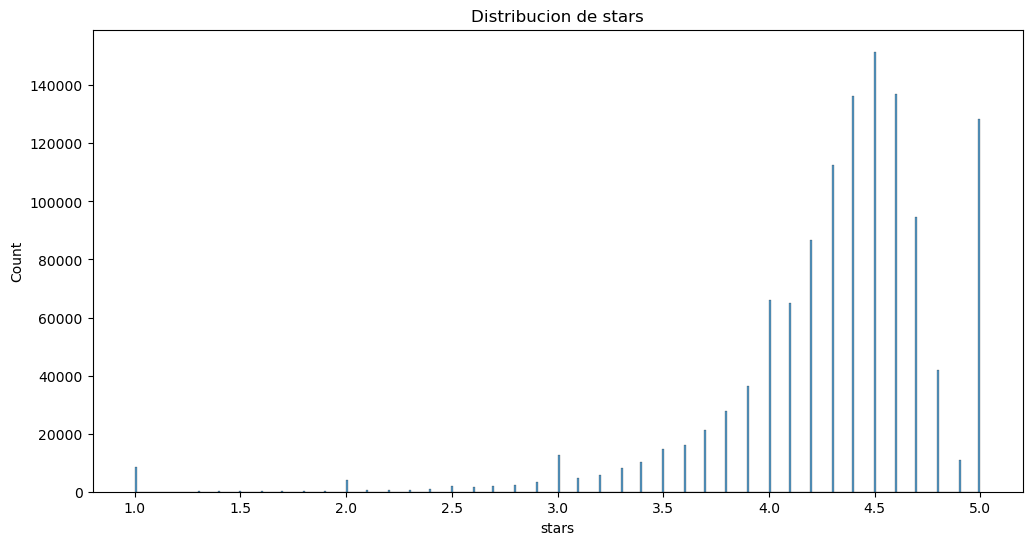

In [108]:
plt.figure(figsize=(12, 6))

sns.histplot(data=rev.stars)

plt.title('Distribucion de stars')

plt.show();

In [109]:
rev.stars.mode()[0]

4.5

In [110]:
rev.stars.mean()

4.31916076222691